# Example - Filling in missing data & dealing with timestamps

In [1]:
import geopandas as gpd

from geocube.api.core import make_geocube

%matplotlib inline

## Load in geopackage data and add CRS

In [2]:
gdf = gpd.read_file("../../test/test_data/input/time_vector_data.geojson")
gdf.crs = {'init': 'epsg:4326'}

In [3]:
gdf.head()

,test_attr,test_str_attr,test_time_attr,geometry
0,1.3,dcf86619,5/21/2016 10:09:21 AM -05:00,POINT (-47.26681 44.21932)
1,1.3,dcf86619,5/21/2016 10:09:21 AM -05:00,POINT (-47.26680 44.21932)
2,1.9,dcf86619,5/21/2016 10:09:21 AM -05:00,POINT (-47.26681 44.21932)
3,1.3,dcf86619,5/21/2016 10:09:21 AM -05:00,POINT (-47.26680 44.21932)
4,1.3,dcf86619,5/21/2016 10:09:21 AM -05:00,POINT (-47.26679 44.21932)


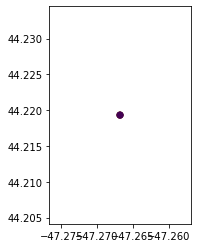

In [4]:
gdf.head().plot(column='test_attr')

## Convert to raster with GeoCube

See docs for [make_geocube](../geocube.rst#make-geocube)

### Load into grid basic

In [5]:
geo_grid = make_geocube(
    vector_data=gdf,
    measurements=['test_attr', "test_time_attr"],
    datetime_measurements=["test_time_attr"],
    resolution=(-0.1, 0.00001),
    group_by="test_time_attr",
)

/home/snowal/miniconda/envs/geocube/lib/python3.6/site-packages/xarray/core/variable.py:151: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  return np.asarray(pd.Series(values.ravel())).reshape(values.shape)


In [6]:
geo_grid

<xarray.Dataset>
Dimensions:         (test_time_attr: 2, x: 12, y: 11)
Coordinates:
  * y               (y) float64 45.25 45.15 45.05 44.95 ... 44.45 44.35 44.25
  * x               (x) float64 -47.27 -47.27 -47.27 ... -47.27 -47.27 -47.27
  * test_time_attr  (test_time_attr) datetime64[ns] 2016-05-21T15:09:21 2016-05-22T15:09:22
    spatial_ref     int64 0
Data variables:
    test_attr       (test_time_attr, y, x) float64 nan nan nan ... nan nan nan
Attributes:
    grid_mapping:  spatial_ref

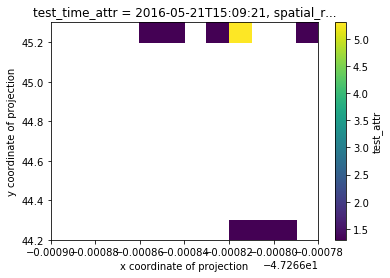

In [7]:
# mask nodata and plot
grid_time_1 = geo_grid.isel(test_time_attr=0)
grid_time_1.test_attr.where(grid_time_1.test_attr!=grid_time_1.test_attr.rio.nodata).plot()

### Load into UTM grid followed by interpolation for missing values

See docs for [make_geocube](../geocube.rst#make-geocube)

In [8]:
geo_grid_interp = make_geocube(
    vector_data=gdf,
    measurements=['test_attr', "test_time_attr"],
    datetime_measurements=["test_time_attr"],
    resolution=(-0.1, 0.00001),
    group_by="test_time_attr",
    interpolate_na_method='nearest'
)

/home/snowal/miniconda/envs/geocube/lib/python3.6/site-packages/xarray/core/variable.py:151: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  return np.asarray(pd.Series(values.ravel())).reshape(values.shape)


In [9]:
geo_grid_interp

<xarray.Dataset>
Dimensions:         (test_time_attr: 2, x: 12, y: 11)
Coordinates:
  * y               (y) float64 45.25 45.15 45.05 44.95 ... 44.45 44.35 44.25
  * x               (x) float64 -47.27 -47.27 -47.27 ... -47.27 -47.27 -47.27
  * test_time_attr  (test_time_attr) datetime64[ns] 2016-05-21T15:09:21 2016-05-22T15:09:22
    spatial_ref     int64 0
Data variables:
    test_attr       (test_time_attr, y, x) float64 1.3 1.3 1.3 ... 1.3 1.3 1.3
Attributes:
    grid_mapping:   spatial_ref
    creation_date:  2019-12-12 19:57:17.046150

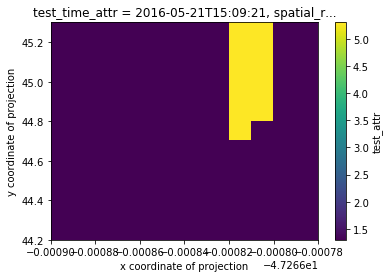

In [10]:
geo_grid_interp.test_attr.isel(test_time_attr=0).plot()